In [ ]:
!pip install panda

In [ ]:
import pandas as pd

### 1. Download and analyse

In [ ]:
data = pd.read_csv("mydataset.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,36083287,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,NaN,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,36083512,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,NaN,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,36084566,东京精品民宿,161702799,Yang,NaN,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,36085357,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,NaN,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


The dataset consists of 14 columns, with different data types in each column. The data types here are float, int, and object. As seen on the data.info(), 'neighbourhood_group' has 0 non-null count, which means all of the values in that column are missing. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11466 non-null  int64  
 1   name                 11466 non-null  object 
 2   host_id              11466 non-null  int64  
 3   host_name            11450 non-null  object 
 4   neighbourhood_group  0 non-null      float64
 5   neighbourhood        11466 non-null  object 
 6   latitude             11466 non-null  float64
 7   longitude            11466 non-null  float64
 8   room_type            11466 non-null  object 
 9   price                11466 non-null  int64  
 10  minimum_nights       11466 non-null  int64  
 11  number_of_reviews    11466 non-null  int64  
 12  last_review          9789 non-null   object 
 13  reviews_per_month    9789 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


Basic statistical methods

In [ ]:
maxVal = data.max()
print("Maxium\n")
print("Price: ", maxVal['price'])
print("Number of Reviews: ", maxVal['number_of_reviews'])
print("Reviews per Month: ", maxVal['reviews_per_month'])
print("\n")
minVal = data.min()
print("Minimum\n")
print("Price: ", minVal['price'])
print("Number of Reviews: ", minVal['number_of_reviews'])
print("Reviews per Month: ", minVal['reviews_per_month'])
print("\n")
meanVal = data.mean()
print("Mean\n")
print("Price: ", meanVal['price'])
print("Number of Reviews: ", meanVal['number_of_reviews'])
print("Reviews per Month: ", meanVal['reviews_per_month'])

Maxium

Price:  1000046
Number of Reviews:  453
Reviews per Month:  51.21


Minimum

Price:  0
Number of Reviews:  0
Reviews per Month:  0.04


Mean

Price:  14984.697976626549
Number of Reviews:  26.028867957439385
Reviews per Month:  2.262539585248754


With the help of max, min, and mean functions we are able to see the statistic of the data. 

### 2. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

Clean the data first

Before processing the data, we should clean all of the missing values in the dataset first. For instance, the column 'neighbourhood_group' have missing values in all of its row. Therefore, we should delete the column since it doesn't hold any information either. 

In [ ]:
data.isnull().sum()

id                         0
name                       0
host_id                    0
host_name                 16
neighbourhood_group    11466
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review             1677
reviews_per_month       1677
dtype: int64

In [ ]:
data.pop("neighbourhood_group")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11461   NaN
11462   NaN
11463   NaN
11464   NaN
11465   NaN
Name: neighbourhood_group, Length: 11466, dtype: float64

In [ ]:
data.shape

(11466, 13)

After dropping the 'neighbourhood_group' column, there are still two columns that hold many missing values, such as 'last_review' and 'reviews_per_month'. Therefore, the rows where both of these columns have nan values will be deleted. 

In [ ]:
data.dropna(subset=['last_review','reviews_per_month'], how='all', inplace=True)

In [ ]:
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11241,35687263,FF304 10min walk to Shinjuku sta/P-WiFi/3pax!,260311661,Yukako,Shinjuku Ku,35.69854,139.69474,Entire home/apt,14957,1,1,2019-06-22,1.00
11257,35696314,10 min. from Sta.:3駅(国分寺･西国分寺･恋ヶ窪)可能!wi-fi完備の静...,64271981,Osamu,Kodaira Shi,35.71626,139.46868,Private room,4950,1,1,2019-06-26,1.00
11316,35790338,A02 ☆Guesthouse Room･新宿ｴﾘｱ･駅から歩く4分 無料Wi-Fi,136876983,Kaoru,Shinjuku Ku,35.70348,139.69823,Entire home/apt,7317,1,1,2019-06-26,1.00
11324,35810682,Iriya☆|8 min|☆Asakusa&Ueno☆|JR Yamanote|Max3|B2,38047329,Ruiko,Taito Ku,35.72061,139.78937,Private room,4950,1,1,2019-06-23,1.00


### Discrete and continous random variables

To identify whether the values are discrete or continuous random variables, we can check the data type first. Usually, an int data type is identified as discrete variables, and float is for the continuous variables. However, sometimes discrete variable can also have float as the data type. Thus, we need to identify the variables furthermore.

In [ ]:
data.dtypes

id                     int64
name                  object
host_id                int64
host_name             object
neighbourhood         object
latitude             float64
longitude            float64
room_type             object
price                  int64
minimum_nights         int64
number_of_reviews      int64
last_review           object
reviews_per_month    float64
dtype: object

Using the **.unique()** function, we can take a look at all of the possible values of the attributes and determine whether it's distinct or continous random variables.

Variables like 'id', 'host_id', 'minimum_nights', 'price', and 'number_of_reviews'are all discrete variable because it all takes on distinct/ seperate values.  

In [ ]:
data['id'].unique()

array([   35303,   197677,   289597, ..., 35790338, 35810682, 35924195])

In [ ]:
data['minimum_nights'].unique()

array([ 28,   3,  30,  29,   1,   5,   2,   4,   7,  35,   6,  14,  31,
        10, 180, 120,  21,  20,  32,  50,   8,  15,  60,  90,  55,  23,
        24,  13])

In [ ]:
data['price'].unique()

Meanwhile, values like 'latitude', 'longitude', and 'reviews_per_month' are continuous variables because they can take on any values in a range. For instance, latitude and longitude can take up any value in the available range, with any level of specificity.  

In [ ]:
data['latitude'].unique()

array([35.67152, 35.71721, 35.74267, ..., 35.64945, 35.69854, 35.70348])

In [ ]:
data['longitude'].unique()

array([139.71203, 139.82596, 139.6581 , ..., 139.46868, 139.69823,
       139.84632])

In [ ]:
data['reviews_per_month'].unique()

### Plot the data distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


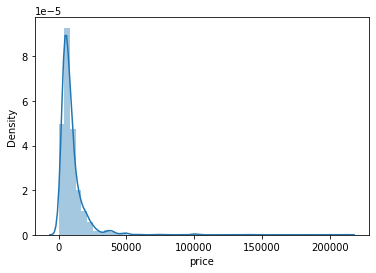

In [ ]:
sb.distplot(data.price[data.room_type == 'Private room'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


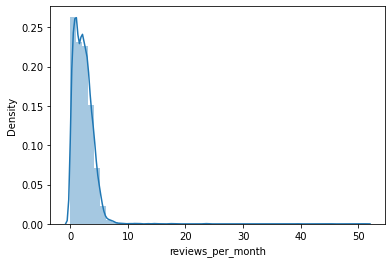

In [ ]:
sb.distplot(data.reviews_per_month)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


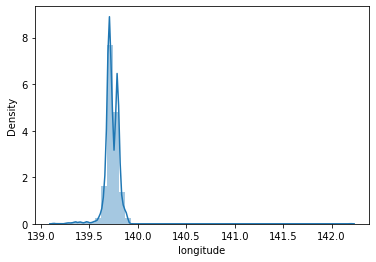

In [ ]:
sb.distplot(data.longitude)

Probability Density Function on a histogram

### 3.

The variable Y can be chosen by looking at the correlation matrix below.The closest the score is to 1 or -1 the stronger the correlation are.
'Reviews_per_month' has the strongest correlation with 'minimum_nigts' and 'number_of_reviews'.
Therefore the predictor of Y will be minimum_nights and number_of_reviews, with 'number_of_reviews' being the positive correlation and 'minimum_nights' the negative correlation. The rest of the variables will not be chosen since they don't have high correlation score with the Y variable. 

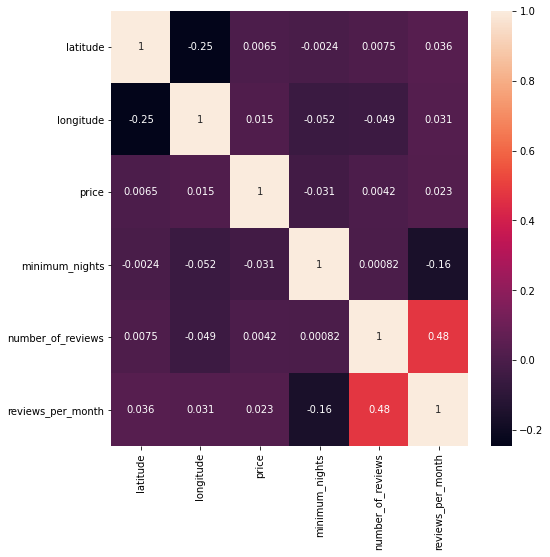

In [ ]:
data2 = data.copy()
#The column id and host_id will be dropped since it serves no purpose
#in the correlation matrix
data2.pop('id')
data2.pop('host_id')
plt.figure(figsize=(8,8))
sb.heatmap(data2.corr(), annot=True)

### 4. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

'Reviews_per_month' will be put into the Y variable, while 'minimum_nights' and 'number_of_reviews' will be variable X.

Then prepare the data for training by using train_test_split, and the test size will be 0.4 which means the dataset will be split 40% as the test dataset. The random state will have a fixed value of 0 so that everytime it's executed, the result won't change.  

In [ ]:
X = data2[['minimum_nights','number_of_reviews']]
Y = data2['reviews_per_month']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=0)

We'll be using Multivariate Linear Regression in this case. 

Train the model using the LinearRegression() function.

In [ ]:
LinReg = LinearRegression().fit(X_train, Y_train)
prediction = LinReg.predict(X_test)
print(prediction)

[2.33247739 1.52668148 1.78070963 ... 0.74377134 1.92248488 1.76537642]


The prediction of the test set result is as shown above on the variable prediction.

### 5. Evaluation metrics

**Overfitting** means a data is feed a lot more data than necessary causing the result and accuracy to decrease. Meanwhile, **underfitting** is when the model is too biased by the pre-built structure and relationship, causing it to pay less attention to the data presented. 

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

The best possible R2 score is 1.0, but based on the result, it showed that our model got a 0.2, which is quite low. Although it is still acceptable. As for MSE, the lower the score is the better they are. 

In [ ]:
print("Evaluation Metrics\n")
print("R2 Score: ", r2_score(Y_test,prediction))
print("MSE Score: ",mean_squared_error(Y_test, prediction))
print("MAE Score: ", mean_absolute_error(Y_test, prediction))

Evaluation Metrics

R2 Score:  0.22106721021273978
MSE Score:  2.757472428743362
MAE Score:  1.0287360051986296


In [ ]:
LinReg.predict([[3,156]])

array([5.09837895])

### 6.

In [ ]:
from sklearn import linear_model

If the predictor of Y is ''reviews_per_month', the R2 score doesn't change much. 

In [ ]:
train, test = train_test_split(data2, test_size=0.3)
regression = linear_model.LinearRegression()
regression.fit(train[['reviews_per_month']], train[['number_of_reviews']])
print('Coefficients: ', regression.coef_)

Coefficients:  [[11.16370323]]


In [ ]:
prediction = regression.predict(test[['reviews_per_month']])
print("R2 Score: ", r2_score(test[['number_of_reviews']], prediction))

R2 Score:  0.18393719644207707


If the predictor of Y is 'minimum_nights' the R2 Score is much worse than the 'reviews_per_month''s result.

In [ ]:
train, test = train_test_split(data2, test_size=0.3)
regression = linear_model.LinearRegression()
regression.fit(train[['reviews_per_month']], train[['minimum_nights']])
print('Coefficients: ', regression.coef_)

Coefficients:  [[-0.62689105]]


In [ ]:
prediction = regression.predict(test[['reviews_per_month']])
print("R2 Score: ", r2_score(test[['minimum_nights']], prediction))

R2 Score:  0.02617232206824671


Let's try 'price' as the Y predictor

In [ ]:
train, test = train_test_split(data2, test_size=0.3)
regression = linear_model.LinearRegression()
regression.fit(train[['reviews_per_month']], train[['minimum_nights']])
print('Coefficients: ', regression.coef_)